# Contoso Online Sales

# 1 Load

## 1.1 Load Lybraries


In [5]:
import pandas as pd
import polars as pl
import numpy as np

#importar la biblioteca
from sklearn.metrics import r2_score

#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Optimization
from sklearn.model_selection import KFold #división del dataset en n pedazos 
from sklearn.model_selection import cross_val_score #tecnica cross value
from sklearn.model_selection import RandomizedSearchCV

from datetime import datetime

## 1.2 Load in Pandas

In [9]:
# Leer el archivo utilizando pandas !
df = pd.read_csv(
    'Contoso_all.txt',           # Ruta al archivo
    sep=';',                # Especificar que el delimitador es un punto y coma
    quotechar='"',          # Especificar que las comillas dobles son el calificador de texto
    encoding='utf-8',  # Usa la codificación que sea compatible con tus datos, como 'ISO-8859-1'
)

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\638222115.py:2: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [10]:
pd.options.display.max_columns = None

In [11]:
df=df.sample(n=1000,random_state=123)

In [12]:
df.shape

(1000, 65)

In [13]:
df.head(3) 

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CurrencyKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitCost,fos_UnitPrice,dcu_FirstName,dcu_MiddleName,dcu_LastName,dcu_BirthDate,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_DateFirstPurchase,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_ProductDescription,dp_ProductSubcategoryKey,dp_Manufacturer,dp_BrandName,dp_ClassID,dp_ClassName,dp_StyleID,dp_StyleName,dp_ColorID,dp_ColorName,dp_Size,dp_Weight,dp_WeightUnitMeasureID,dp_UnitOfMeasureID,dp_UnitOfMeasureName,dp_StockTypeID,dp_StockTypeName,dp_UnitCost,dp_UnitPrice,dp_AvailableForSaleDate,dp_StopSaleDate,dp_Status,ds_StoreManager,ds_StoreType,ds_StoreName,ds_StoreDescription,ds_Status,ds_EmployeeCount,ds_SellingAreaSize,dc_CurrencyName
11303881,30864365,2009-12-22 00:00:00,199,912,22,1,19032,200912223CS948,1,76.72,0,0.0,1,19.18,44.10,44.10,95.9,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,WaterburyCompany,SV 160GB USB2.0 Portable Hard Disk M65 Black,Ultra durable160GB USB portable storage,22,Southridge Video,Southridge Video,2,Regular,3.0,Product0308170,2,Black,NaN,NaN,NaN,1,inches,2,Mid,44.10,95.9,2008-12-08 00:00:00,NaN,On,212,Online,Contoso North America Online Store,Contoso Online Store,On,325,500,USD
10943513,30503997,2009-11-29 00:00:00,199,193,22,1,19022,200911292CS937,1,559.20,0,0.0,1,139.80,321.44,321.44,699.0,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,TallahasseeCompany,Litware Home Theater System 5.1 Channel M511 B...,1000watts over 5 channels,11,"Litware, Inc.",Litware,2,Regular,1.0,Product0203002,2,Black,20 x 43 x 17,62.0,pounds,1,inches,3,Low,321.44,699.0,2007-08-23 00:00:00,NaN,On,212,Online,Contoso North America Online Store,Contoso Online Store,On,325,500,USD
6185590,25746074,2008-12-08 00:00:00,306,1166,19,1,19060,200812084CS676,1,132.00,0,0.0,1,33.00,84.12,84.12,165.0,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,ReadingCompany,Fabrikam Social Videographer 1/3'' 8.5mm E200 ...,720p high definition or VGA,27,"Fabrikam, Inc.",Fabrikam,1,Economy,4.0,Product0405023,2,Black,2.8 x 5.2 x 1.3,1.5,pounds,1,inches,3,Low,84.12,165.0,2007-03-04 00:00:00,NaN,NaN,246,Online,Contoso Europe Online Store,Contoso Europe Online Store,On,7,1000,USD


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 11303881 to 2247530
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fos_OnlineSalesKey        1000 non-null   int64  
 1   fos_DateKey               1000 non-null   object 
 2   fos_StoreKey              1000 non-null   int64  
 3   fos_ProductKey            1000 non-null   int64  
 4   fos_PromotionKey          1000 non-null   int64  
 5   fos_CurrencyKey           1000 non-null   int64  
 6   fos_CustomerKey           1000 non-null   int64  
 7   fos_SalesOrderNumber      1000 non-null   object 
 8   fos_SalesQuantity         1000 non-null   int64  
 9   fos_SalesAmount           1000 non-null   float64
 10  fos_ReturnQuantity        1000 non-null   int64  
 11  fos_ReturnAmount          1000 non-null   float64
 12  fos_DiscountQuantity      1000 non-null   int64  
 13  fos_DiscountAmount        1000 non-null   float64
 14  fos

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df.isnull().sum()

fos_OnlineSalesKey     0
fos_DateKey            0
fos_StoreKey           0
fos_ProductKey         0
fos_PromotionKey       0
                      ..
ds_StoreDescription    0
ds_Status              0
ds_EmployeeCount       0
ds_SellingAreaSize     0
dc_CurrencyName        0
Length: 65, dtype: int64

In [17]:
df.isnull().sum().to_string()

'fos_OnlineSalesKey             0\nfos_DateKey                    0\nfos_StoreKey                   0\nfos_ProductKey                 0\nfos_PromotionKey               0\nfos_CurrencyKey                0\nfos_CustomerKey                0\nfos_SalesOrderNumber           0\nfos_SalesQuantity              0\nfos_SalesAmount                0\nfos_ReturnQuantity             0\nfos_ReturnAmount               0\nfos_DiscountQuantity           0\nfos_DiscountAmount             0\nfos_TotalCost                  0\nfos_UnitCost                   0\nfos_UnitPrice                  0\ndcu_FirstName                776\ndcu_MiddleName               859\ndcu_LastName                 776\ndcu_BirthDate                776\ndcu_Edad                       0\ndcu_MaritalStatus            776\ndcu_Gender                   776\ndcu_YearlyIncome               0\ndcu_TotalChildren            776\ndcu_NumberChildrenAtHome     776\ndcu_Education                776\ndcu_Occupation               776\ndcu_HouseOwne

## 1.3 Columnas Requeridas


In [18]:
# Lista de las columnas que quieres filtrar
columnas_requeridas = ['fos_OnlineSalesKey','fos_DateKey','fos_StoreKey', 'fos_ProductKey',
                       'fos_PromotionKey', 'fos_CustomerKey','fos_SalesOrderNumber',
                       'fos_SalesQuantity',
                      'fos_SalesAmount','fos_ReturnQuantity','fos_ReturnAmount','fos_DiscountQuantity','fos_DiscountAmount',
                      'fos_TotalCost',
                      'fos_UnitPrice',#'dcu_BirthDate',
                      'dcu_Edad',
                      'dcu_MaritalStatus','dcu_Gender','dcu_YearlyIncome','dcu_TotalChildren','dcu_NumberChildrenAtHome',
                      'dcu_Education','dcu_Occupation','dcu_HouseOwnerFlag','dcu_NumberCarsOwned','dcu_CustomerType',
                      'dcu_CompanyName','dp_ProductName','dp_Manufacturer','dp_BrandName',
                      'dp_ClassName','dp_ColorID','dp_ColorName','ds_StoreName']

# Filtrar el DataFrame con las columnas requeridas Ademas solo las ventas efectivas! las que excluyo son las que son devoluciones
df_ = df[df['fos_ReturnQuantity'] == 0][columnas_requeridas]
#df_ = df[columnas_requeridas]

In [19]:
df_.sample(2)

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorID,dp_ColorName,ds_StoreName
10976494,30536978,2009-12-01 00:00:00,307,1698,23,19142,200912017CS732,1,5.9415,0,0.0,1,1.0485,3.56,6.99,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,TokyoCompany,SV Hand Games for students E40 Red,Southridge Video,Southridge Video,Economy,6,Red,Contoso Asia Online Store
8293172,27853656,2009-05-28 00:00:00,306,1725,1,5037,20090528716036,1,56.0000,0,0.0,0,0.0000,28.55,56.00,62,M,F,10000,1.0,0.0,Bachelors,Manual,1.0,0.0,Person,NaN,MGS Dungeon Siege II E105,Tailspin Toys,Tailspin Toys,Economy,7,Silver,Contoso Europe Online Store


In [20]:
df_.shape

(997, 34)

In [21]:
df_.isnull().sum()

fos_OnlineSalesKey            0
fos_DateKey                   0
fos_StoreKey                  0
fos_ProductKey                0
fos_PromotionKey              0
fos_CustomerKey               0
fos_SalesOrderNumber          0
fos_SalesQuantity             0
fos_SalesAmount               0
fos_ReturnQuantity            0
fos_ReturnAmount              0
fos_DiscountQuantity          0
fos_DiscountAmount            0
fos_TotalCost                 0
fos_UnitPrice                 0
dcu_Edad                      0
dcu_MaritalStatus           773
dcu_Gender                  773
dcu_YearlyIncome              0
dcu_TotalChildren           773
dcu_NumberChildrenAtHome    773
dcu_Education               773
dcu_Occupation              773
dcu_HouseOwnerFlag          773
dcu_NumberCarsOwned         773
dcu_CustomerType              0
dcu_CompanyName             224
dp_ProductName                0
dp_Manufacturer               0
dp_BrandName                  0
dp_ClassName                  0
dp_Color

Al Parecer anda limpia la DB
ya que si hay vacios es por que unos son clientes del tipo PERSONA y Compañia

Adicional a ello hay ventas con "fos_SalesAmount" = 0 Esto es por que se genera una SalesORder para devolver un producto y en este caso se llenan "fos_ReturnQuantity" y "fos_ReturnAmount" para registrar la devolucion


In [22]:
df_.describe(include = [np.number])

,fos_OnlineSalesKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dp_ColorID
count,9.970000e+02,997.000000,997.000000,997.000000,997.00000,997.0,997.000000,997.0,997.0,997.000000,997.000000,997.000000,997.000000,997.000000,9.970000e+02,224.000000,224.000000,224.000000,224.000000,997.000000
mean,2.600162e+07,264.790371,1366.013039,10.189569,16744.78335,1.0,223.933648,0.0,0.0,0.676028,21.738558,111.785446,245.672207,13.061184,7.766289e+06,1.986607,1.156250,0.660714,1.473214,6.359077
std,3.698641e+06,52.430363,827.425974,9.179774,4971.43716,0.0,340.746526,0.0,0.0,0.468224,45.859644,145.443562,370.635251,26.572385,4.151585e+06,1.548846,1.549673,0.474527,1.174923,3.622144
min,1.956645e+07,199.000000,2.000000,1.000000,75.00000,1.0,2.352000,0.0,0.0,0.000000,0.000000,1.500000,2.940000,-1.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.282382e+07,199.000000,606.000000,1.000000,18783.00000,1.0,22.000000,0.0,0.0,0.000000,0.000000,12.410000,24.990000,-1.000000,1.000000e+07,1.000000,0.000000,0.000000,0.750000,2.000000
50%,2.609015e+07,306.000000,1380.000000,8.000000,19036.00000,1.0,114.210000,0.0,0.0,1.000000,2.999000,65.770000,126.900000,-1.000000,1.000000e+07,2.000000,0.000000,1.000000,1.000000,7.000000
75%,2.922417e+07,307.000000,2144.000000,19.000000,19086.00000,1.0,289.990000,0.0,0.0,1.000000,25.000000,155.890000,310.000000,-1.000000,1.000000e+07,3.000000,2.000000,1.000000,2.000000,8.000000
max,3.215319e+07,307.000000,2517.000000,28.000000,19145.00000,1.0,3199.990000,0.0,0.0,1.000000,499.800000,1060.220000,3199.990000,91.000000,1.000000e+07,5.000000,5.000000,1.000000,4.000000,16.000000


In [23]:
df_.describe(include = [object])

,fos_DateKey,fos_SalesOrderNumber,dcu_MaritalStatus,dcu_Gender,dcu_Education,dcu_Occupation,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorName,ds_StoreName
count,997,997,224,224,224,224,997,773,997,997,997,997,997,997
unique,644,977,2,2,5,5,2,279,646,11,14,3,16,3
top,2009-11-10 00:00:00,200811135CS791,M,M,Partial College,Skilled Manual,Company,MoscowCompany,SV 16xDVD M360 Black,"Contoso, Ltd",Contoso,Economy,Black,Contoso North America Online Store
freq,5,2,122,120,60,59,773,12,30,348,335,462,266,387


In [24]:
df_company = df_.loc[df_['dcu_CustomerType']=='Company']


In [25]:
df_company.shape

(773, 34)

In [26]:
df_person = df_.loc[df_['dcu_CustomerType']=='Person']

In [27]:
df_person.shape

(224, 34)

## 1.4 Transform

In [28]:
df_.dtypes

fos_OnlineSalesKey            int64
fos_DateKey                  object
fos_StoreKey                  int64
fos_ProductKey                int64
fos_PromotionKey              int64
fos_CustomerKey               int64
fos_SalesOrderNumber         object
fos_SalesQuantity             int64
fos_SalesAmount             float64
fos_ReturnQuantity            int64
fos_ReturnAmount            float64
fos_DiscountQuantity          int64
fos_DiscountAmount          float64
fos_TotalCost               float64
fos_UnitPrice               float64
dcu_Edad                      int64
dcu_MaritalStatus            object
dcu_Gender                   object
dcu_YearlyIncome              int64
dcu_TotalChildren           float64
dcu_NumberChildrenAtHome    float64
dcu_Education                object
dcu_Occupation               object
dcu_HouseOwnerFlag          float64
dcu_NumberCarsOwned         float64
dcu_CustomerType             object
dcu_CompanyName              object
dp_ProductName              

In [29]:
# Convertir algunas columnas a categorías para ahorrar memoria (datos string con pocos distincValues)
df_['dcu_MaritalStatus'] = df_['dcu_MaritalStatus'].astype('category')
df_['dcu_Gender'] = df_['dcu_Gender'].astype('category')
df_['dcu_Education'] = df_['dcu_Education'].astype('category')
df_['dcu_Occupation'] = df_['dcu_Occupation'].astype('category')
df_['dcu_CustomerType'] = df_['dcu_CustomerType'].astype('category')
df_['dcu_CompanyName'] = df_['dcu_CompanyName'].astype('category')

In [30]:
# Encontre que hay datos como OnlineSalesKey es numero, pero su valor no es para contar ni nada, lo paso a cadena

df_['fos_OnlineSalesKey'] = df_['fos_OnlineSalesKey'].astype('object')
df_['fos_StoreKey'] = df_['fos_StoreKey'].astype('object')
df_['fos_ProductKey'] = df_['fos_ProductKey'].astype('object')
df_['fos_CustomerKey'] = df_['fos_CustomerKey'].astype('object')
df_['fos_PromotionKey'] = df_['fos_PromotionKey'].astype('object')



In [31]:
# Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date
# Extraer año y mes para agrupar las ventas
df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

#Columnas Adicionales
df_['Utilidad'] = df_['fos_SalesAmount'] - df_['fos_TotalCost']

In [32]:
df_.head(4)

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorID,dp_ColorName,ds_StoreName,YearMonth,Utilidad
11303881,30864365,2009-12-22,199,912,22,19032,200912223CS948,1,76.72,0,0.0,1,19.18,44.10,95.9,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,WaterburyCompany,SV 160GB USB2.0 Portable Hard Disk M65 Black,Southridge Video,Southridge Video,Regular,2,Black,Contoso North America Online Store,2009-12,32.62
10943513,30503997,2009-11-29,199,193,22,19022,200911292CS937,1,559.20,0,0.0,1,139.80,321.44,699.0,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,TallahasseeCompany,Litware Home Theater System 5.1 Channel M511 B...,"Litware, Inc.",Litware,Regular,2,Black,Contoso North America Online Store,2009-11,237.76
6185590,25746074,2008-12-08,306,1166,19,19060,200812084CS676,1,132.00,0,0.0,1,33.00,84.12,165.0,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,ReadingCompany,Fabrikam Social Videographer 1/3'' 8.5mm E200 ...,"Fabrikam, Inc.",Fabrikam,Economy,2,Black,Contoso Europe Online Store,2008-12,47.88
431283,19991767,2007-03-06,199,1003,2,17344,20070306428343,1,156.75,0,0.0,1,8.25,75.88,165.0,46,S,F,30000,0.0,0.0,Partial High School,Clerical,0.0,2.0,Person,NaN,A. Datum Ultra Compact Digital Camera M190 Orange,A. Datum Corporation,A. Datum,Economy,9,Orange,Contoso North America Online Store,2007-03,80.87


In [33]:
df_.sample(5)['dcu_Edad']

2609706   -1
4858029   -1
4024680   -1
6174127   -1
8134847   -1
Name: dcu_Edad, dtype: int64

In [63]:
count_edad_neg = df_person['dcu_Edad'].value_counts()
count_edad_neg

dcu_Edad
62    11
53    10
50    10
52     9
57     9
60     9
61     9
56     9
70     8
64     8
59     8
58     7
51     7
72     7
67     6
76     6
54     6
69     6
71     6
55     5
66     5
45     5
73     5
48     5
63     5
68     4
77     4
65     4
46     4
47     3
75     3
81     3
78     2
84     2
44     2
74     2
49     2
89     1
80     1
43     1
88     1
82     1
79     1
91     1
83     1
Name: count, dtype: int64

In [35]:
# Desactivar la notación científica en pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# 2 EDA General

## 2.0 Variables

In [36]:
df_.shape

(997, 36)

In [37]:
df_person.shape

(224, 34)

In [38]:
df_person['dcu_MaritalStatus'].value_counts(dropna=False) 

dcu_MaritalStatus
M    122
S    102
Name: count, dtype: int64

In [39]:
df_person['dcu_MaritalStatus'].value_counts(normalize=True,dropna=False) # el normalize me da en proporcion, el dropna incluye a los NaN

dcu_MaritalStatus
M   0.54
S   0.46
Name: proportion, dtype: float64

In [40]:
df_person['dcu_Gender'].value_counts(dropna=False)

dcu_Gender
M    120
F    104
Name: count, dtype: int64

In [41]:
df_person['dcu_Gender'].value_counts(dropna=False,normalize=True)

dcu_Gender
M   0.54
F   0.46
Name: proportion, dtype: float64

In [42]:
df_person['dcu_Education'].value_counts(dropna=False)

dcu_Education
Partial College        60
Bachelors              59
High School            44
Graduate Degree        35
Partial High School    26
Name: count, dtype: int64

In [43]:
df_person['dcu_Education'].value_counts(dropna=False, normalize=True)

dcu_Education
Partial College       0.27
Bachelors             0.26
High School           0.20
Graduate Degree       0.16
Partial High School   0.12
Name: proportion, dtype: float64

In [47]:
df_['dcu_Education'].value_counts()

dcu_Education
Partial College        60
Bachelors              59
High School            44
Graduate Degree        35
Partial High School    26
Name: count, dtype: int64

In [46]:
df_['dcu_Occupation'].value_counts(dropna=False,normalize=True)

dcu_Occupation
NaN              0.78
Skilled Manual   0.06
Professional     0.06
Clerical         0.04
Management       0.04
Manual           0.03
Name: proportion, dtype: float64

## 2.1 - Clientes ALL


### ¿Cúantos clientes del tipo Persona y Compañia existen?

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\433467554.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_clientes = df_.groupby('dcu_CustomerType')['fos_CustomerKey'].nunique().reset_index()
C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\433467554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de Cliente', y='Número de Clientes', data=conteo_clientes, palette="Blues_d")


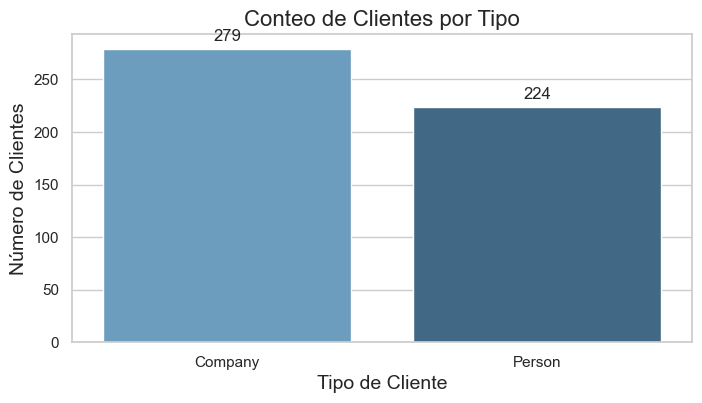

In [48]:
# Agrupar por 'dcu_CustomerType' y contar los clientes distintos en 'fos_CustomerKey'
conteo_clientes = df_.groupby('dcu_CustomerType')['fos_CustomerKey'].nunique().reset_index()

# Renombrar las columnas para mayor claridad
conteo_clientes.columns = ['Tipo de Cliente', 'Número de Clientes']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Tipo de Cliente', y='Número de Clientes', data=conteo_clientes, palette="Blues_d")

# Agregar etiquetas y título
ax.set_title('Conteo de Clientes por Tipo', fontsize=16)
ax.set_xlabel('Tipo de Cliente', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)

# Mostrar los valores en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()

A Cuanto asciende el total de ventas?

In [49]:
# Sumar el total de ventas
total_ventas = df_['fos_SalesAmount'].sum()

# Mostrar el resultado
print(f'El monto total de ventas es: {total_ventas:,.2f}')

El monto total de ventas es: 223,261.85


### ¿Qué clientes me da más ingresos?

In [50]:
# Agrupar por 'dcu_CustomerType' y sumar los montos de ventas
ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Calcular el total de ingresos
total_ingresos = ingresos_por_cliente['Total de Ingresos'].sum()

# Agregar una columna de cuota de ventas en porcentaje
ingresos_por_cliente['Cuota de Venta (%)'] = (ingresos_por_cliente['Total de Ingresos'] / total_ingresos) * 100

# Ordenar los resultados por ingresos en orden descendente
ingresos_por_cliente = ingresos_por_cliente.sort_values(by='Total de Ingresos', ascending=False)

# Mostrar la tabla con los ingresos por tipo de cliente y la cuota de venta
print(ingresos_por_cliente)


  Tipo de Cliente  Total de Ingresos  Cuota de Venta (%)
0         Company          171591.52               76.86
1          Person           51670.33               23.14


C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\127266525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Cliente', y='Total de Ingresos', data=ingresos_por_cliente, palette="Blues_d")


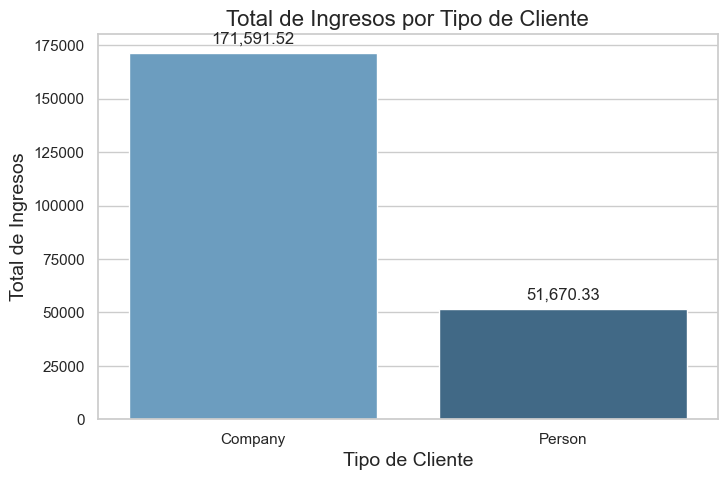

In [54]:
# Asegurarte de tener los mismos datos correctos
#ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
#ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo de Cliente', y='Total de Ingresos', data=ingresos_por_cliente, palette="Blues_d")

# Añadir etiquetas y título
plt.title('Total de Ingresos por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Total de Ingresos', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


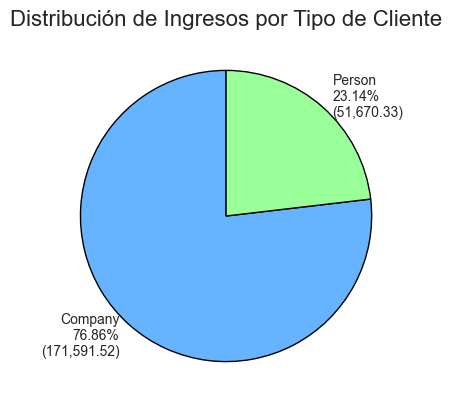

In [52]:
 
# Agrupar por 'dcu_CustomerType' y sumar los montos de ventas
#ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
#ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Calcular el total de ingresos
#total_ingresos = ingresos_por_cliente['Total de Ingresos'].sum()

# Agregar una columna de cuota de ventas en porcentaje
#ingresos_por_cliente['Cuota de Venta (%)'] = (ingresos_por_cliente['Total de Ingresos'] / total_ingresos) * 100

# Ordenar los resultados por ingresos en orden descendente
#ingresos_por_cliente = ingresos_por_cliente.sort_values(by='Total de Ingresos', ascending=False)

# Crear el gráfico circular con los valores correctos
plt.figure(figsize=(5, 4))

# Extraer los valores y etiquetas para el gráfico
valores = ingresos_por_cliente['Total de Ingresos'].values
etiquetas = ingresos_por_cliente['Tipo de Cliente'].values

# Preparar etiquetas personalizadas con los valores correctos
etiquetas_personalizadas = [
    f'{tipo}\n{cuota:.2f}%\n({ingreso:,.2f})' 
    for tipo, cuota, ingreso in zip(ingresos_por_cliente['Tipo de Cliente'], ingresos_por_cliente['Cuota de Venta (%)'], ingresos_por_cliente['Total de Ingresos'])
]

# Crear gráfico de pastel utilizando las etiquetas personalizadas
plt.pie(valores, labels=etiquetas_personalizadas,
        colors=['#66b3ff', '#99ff99'], startangle=90, wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 10}, labeldistance=1.1)

# Ajustar el layout para mejorar la visibilidad
plt.tight_layout()

# Agregar título
plt.title('Distribución de Ingresos por Tipo de Cliente', fontsize=16)

# Mostrar el gráfico
plt.show()


### Número de Ventas realizadas a Personas vs Compañias

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\525432486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordenes_por_tipo_cliente = df_.groupby('dcu_CustomerType')['fos_SalesOrderNumber'].nunique().reset_index()
C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\525432486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Cliente', y='Número de Órdenes Únicas', data=ordenes_por_tipo_cliente, palette="muted")


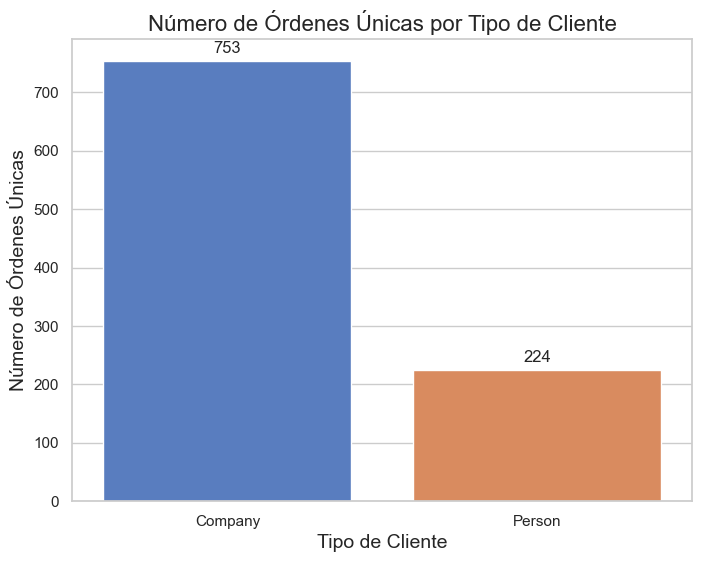

In [53]:
# Paso 1: Agrupar por 'dcu_CustomerType' y contar las órdenes únicas
ordenes_por_tipo_cliente = df_.groupby('dcu_CustomerType')['fos_SalesOrderNumber'].nunique().reset_index()

# Renombrar la columna para mayor claridad
ordenes_por_tipo_cliente.columns = ['Tipo de Cliente', 'Número de Órdenes Únicas']

# Paso 2: Graficar el número de órdenes únicas por tipo de cliente
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Cliente', y='Número de Órdenes Únicas', data=ordenes_por_tipo_cliente, palette="muted")

# Añadir etiquetas y título
plt.title('Número de Órdenes Únicas por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Número de Órdenes Únicas', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


### Arpu de Cliente vs Arpu de Compañia

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\3591961452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingreso_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesAmount'].sum().reset_index()
C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\3591961452.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordenes_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesOrderNumber'].nunique().reset_index()
C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\3591961452.py:17: FutureWarning: The default of observed=False is deprecated an

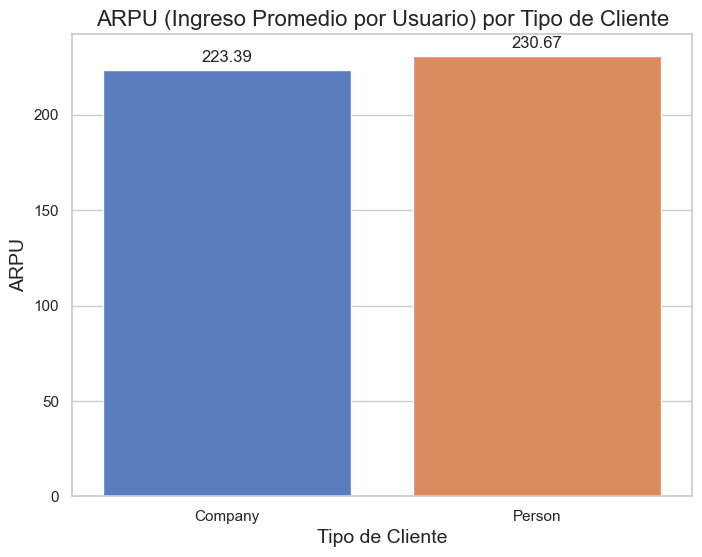

In [55]:
# Paso 1: Calcular el ingreso total por cliente
ingreso_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesAmount'].sum().reset_index()

# Paso 2: Calcular el número de órdenes por cliente
ordenes_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesOrderNumber'].nunique().reset_index()

# Unir las dos tablas por 'dcu_CustomerType' y 'fos_CustomerKey'
cliente_data = pd.merge(ingreso_por_cliente, ordenes_por_cliente, on=['dcu_CustomerType', 'fos_CustomerKey'])

# Renombrar las columnas para mayor claridad
cliente_data.columns = ['Tipo de Cliente', 'CustomerKey', 'Total de Ingresos', 'Número de Órdenes']

# Paso 3: Calcular el ARPU por cliente
cliente_data['ARPU'] = cliente_data['Total de Ingresos'] / cliente_data['Número de Órdenes']

# Paso 4: Calcular el ARPU promedio por tipo de cliente
arpu_por_tipo = cliente_data.groupby('Tipo de Cliente')['ARPU'].mean().reset_index()

# Paso 5: Graficar el ARPU por tipo de cliente
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Cliente', y='ARPU', data=arpu_por_tipo, palette="muted")

# Añadir etiquetas y título
plt.title('ARPU (Ingreso Promedio por Usuario) por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('ARPU', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


## 2.2 - Productos AllData

### Cúantos Productos distintos se tienen en las ventas?

In [56]:
# Contar el número de productos únicos en 'dp_ProductName'
numero_productos_unicos = df_['dp_ProductName'].nunique()

# Mostrar el resultado
print(f'Número de productos únicos: {numero_productos_unicos}')


Número de productos únicos: 646


### Cúal es el producto mas Vendido ?
Producto con mas unidades vendidas

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_14576\1905261129.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fos_SalesQuantity', y='dp_ProductName', data=top_10_productos, palette="viridis")


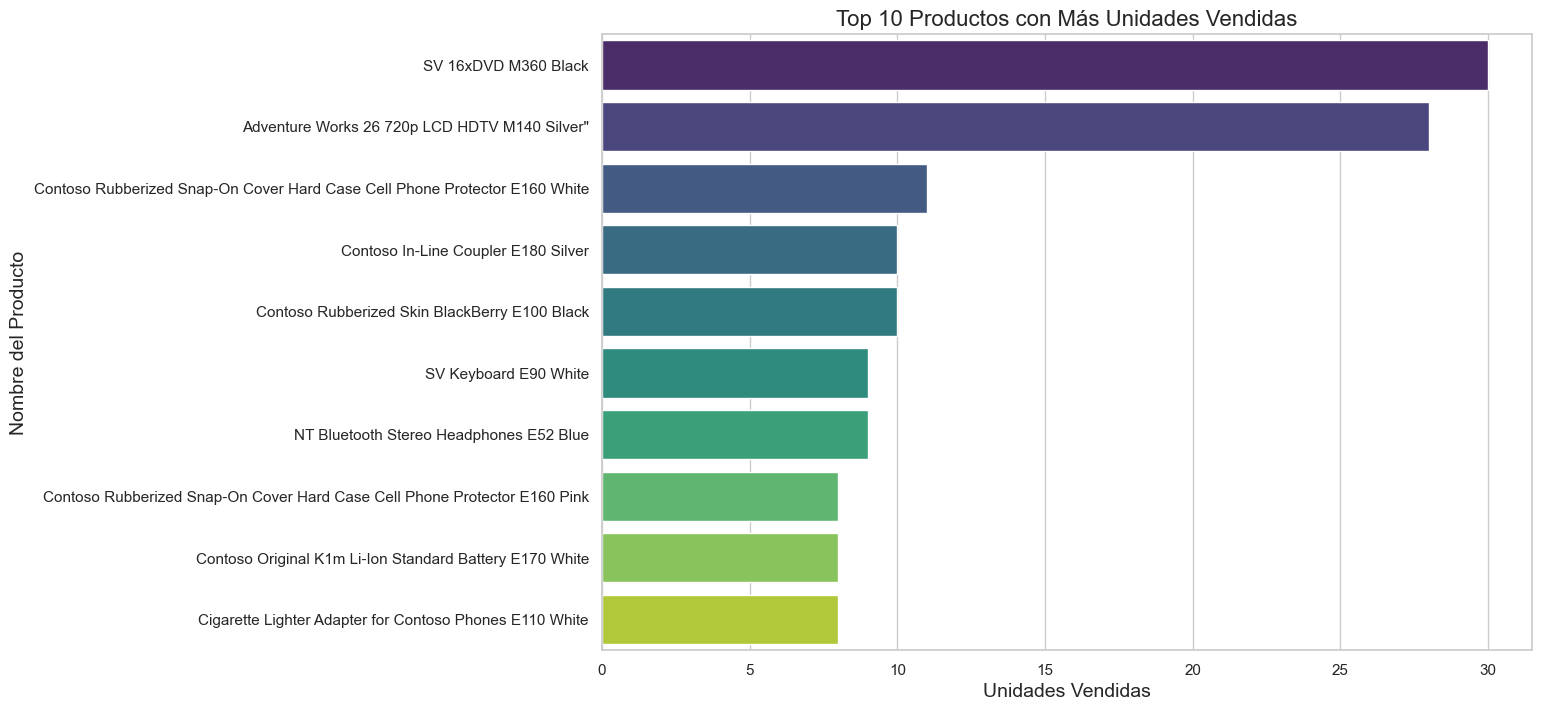

In [57]:
# Paso 1: Agrupar por 'dp_ProductName' y sumar las unidades vendidas
unidades_por_producto = df_.groupby('dp_ProductName')['fos_SalesQuantity'].sum().reset_index()

# Paso 2: Ordenar los productos por unidades vendidas en orden descendente
unidades_por_producto = unidades_por_producto.sort_values(by='fos_SalesQuantity', ascending=False)

# Paso 3: Seleccionar el top 10 de productos
top_10_productos = unidades_por_producto.head(10)

# Paso 4: Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='fos_SalesQuantity', y='dp_ProductName', data=top_10_productos, palette="viridis")

# Añadir etiquetas y título
plt.title('Top 10 Productos con Más Unidades Vendidas', fontsize=16)
plt.xlabel('Unidades Vendidas', fontsize=14)
plt.ylabel('Nombre del Producto', fontsize=14)

# Mostrar el gráfico
plt.show()


### Participacion de las Marcas

## 2.3 - Series Temporales

### Numero de SalesOrder & Ventas ($)

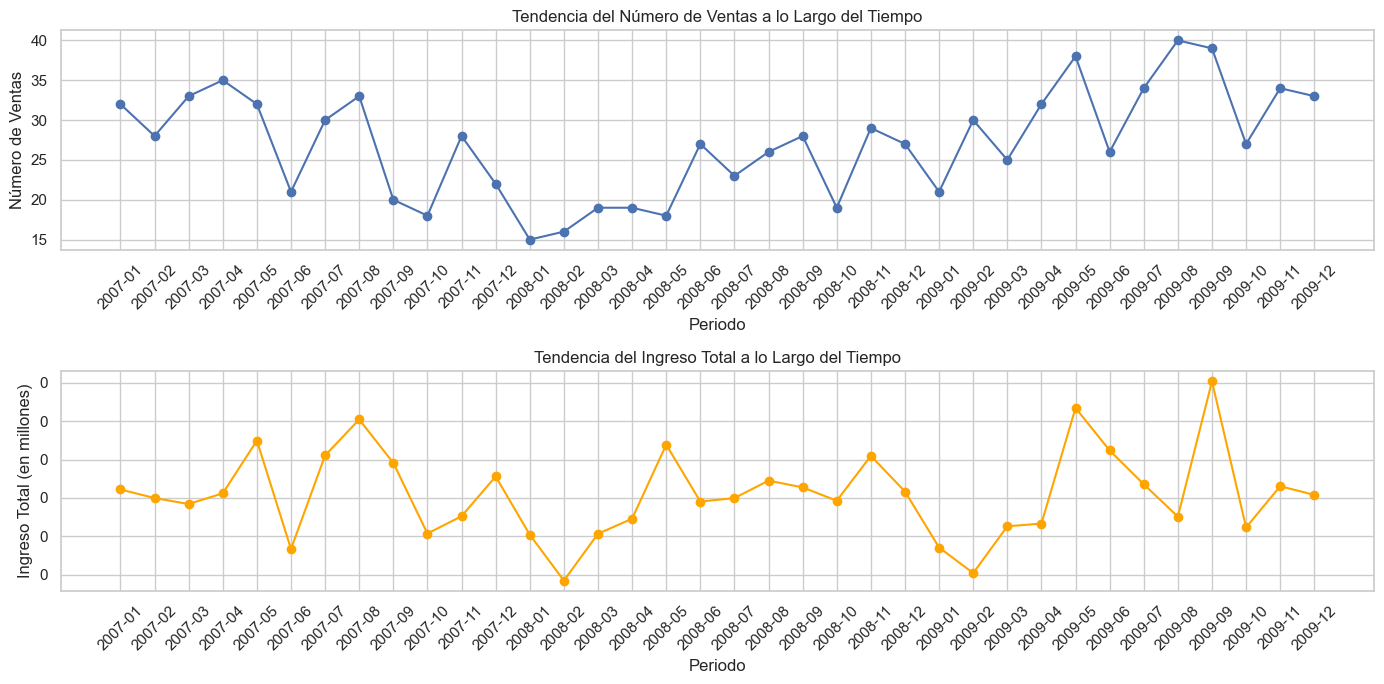

In [58]:
# Paso 1: Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
#df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date

# Paso 2: Extraer año y mes para agrupar las ventas
#df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

# Paso 3: Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total
ventas_por_mes = df_.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',   # Número de ventas
    'fos_SalesAmount': 'sum'             # Ingreso total
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_mes.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 4: Visualizar la tendencia de ventas y de ingresos
plt.figure(figsize=(14, 7))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_por_mes['Periodo'].astype(str), ventas_por_mes['Numero de Ventas'], marker='o')
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_por_mes['Periodo'].astype(str), ventas_por_mes['Ingreso Total'], marker='o', color='orange')
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


## para ver estacionalidad

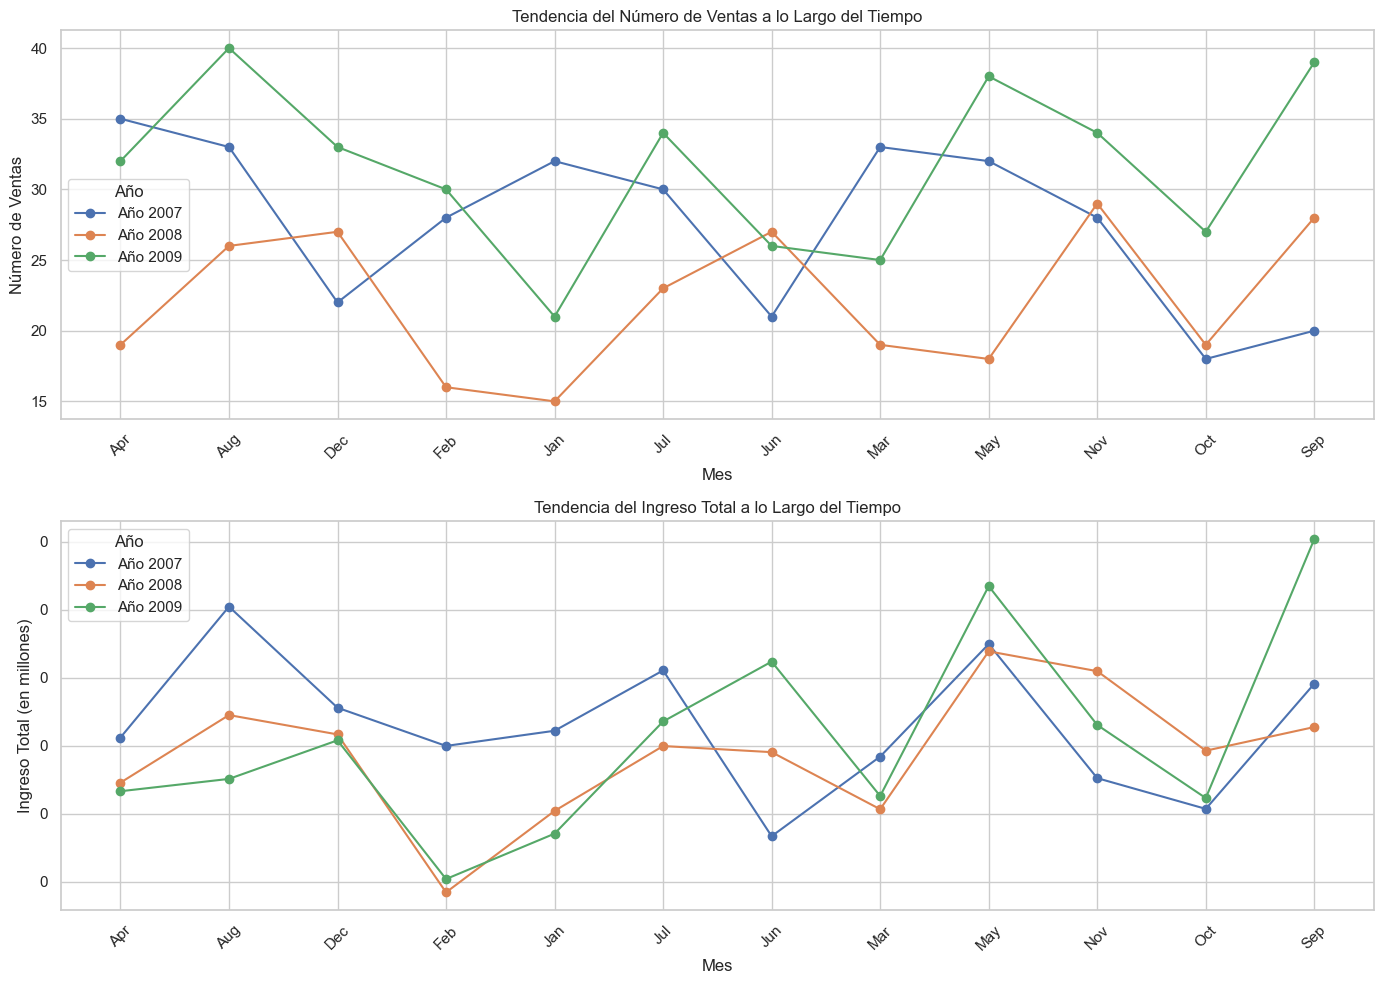

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Convertir 'fos_DateKey' a formato de fecha
df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey'])

# Paso 2: Extraer año y mes para agrupar las ventas
df_['YearMonth'] = df_['fos_DateKey'].dt.to_period('M')
df_['Year'] = df_['fos_DateKey'].dt.year
df_['Month'] = df_['fos_DateKey'].dt.month

# Paso 3: Agrupar por 'Year' y 'Month' y calcular el número de ventas y el ingreso total
ventas_por_mes = df_.groupby(['Year', 'Month']).agg({
    'fos_SalesOrderNumber': 'nunique',   # Número de ventas
    'fos_SalesAmount': 'sum'             # Ingreso total
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_mes.columns = ['Año', 'Mes', 'Número de Ventas', 'Ingreso Total']

# Convertir el mes a nombre del mes para mostrar en el gráfico
ventas_por_mes['Mes'] = ventas_por_mes['Mes'].apply(lambda x: pd.Timestamp(f'2000-{x:02d}-01').strftime('%b'))

# Ordenar los datos por Año y Mes
ventas_por_mes = ventas_por_mes.sort_values(by=['Año', 'Mes'])

# Crear el gráfico
plt.figure(figsize=(14, 10))

# Gráfico de línea apilada para el número de ventas
plt.subplot(2, 1, 1)
for year in ventas_por_mes['Año'].unique():
    subset = ventas_por_mes[ventas_por_mes['Año'] == year]
    plt.plot(subset['Mes'], subset['Número de Ventas'], marker='o', label=f'Año {year}')
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad
plt.legend(title='Año')

# Gráfico de línea apilada para el ingreso total
plt.subplot(2, 1, 2)
for year in ventas_por_mes['Año'].unique():
    subset = ventas_por_mes[ventas_por_mes['Año'] == year]
    plt.plot(subset['Mes'], subset['Ingreso Total'], marker='o', label=f'Año {year}')
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ingreso Total (en millones)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad
plt.legend(title='Año')

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


▲ Se observa que 2007-05 se tienen los mayores ingresos, sin embargo la cantidad de Ordenes no fue la mas alta.
  
  Hipotesis 01 :
  El alza en las ventas($) es por que se ha tenido altas compras de las compañias y tambien ha sido un buen mes para las ventas a personas.

### Cantidad SalesOrder & Ventas($)  / Comparativo: Compañia vs Personas

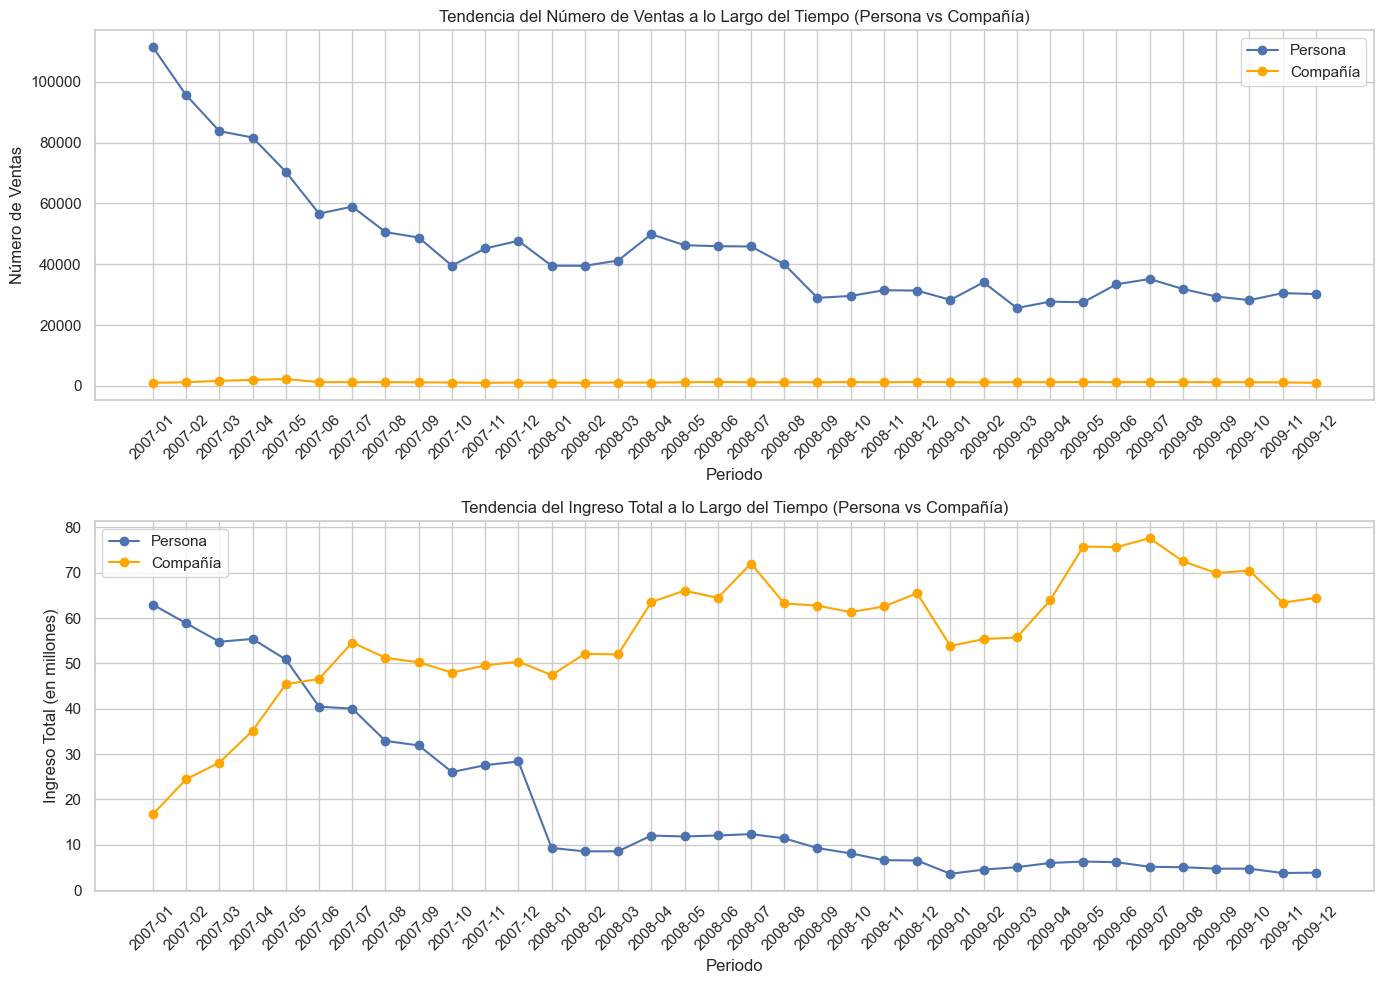

In [188]:
# Paso 3: Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Paso 4: Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total para cada tipo de cliente
ventas_persona = df_persona.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

ventas_compania = df_compania.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_persona.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_compania.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 5: Visualizar la tendencia de ventas y de ingresos comparando Persona vs Compañía
plt.figure(figsize=(14, 10))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Numero de Ventas'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Numero de Ventas'], marker='o', label='Compañía', color='orange')
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Ingreso Total'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Ingreso Total'], marker='o', label='Compañía', color='orange')
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


▲ Como se observa en las imagenes:
+ Hipotesis (01) : Se Contraste lo dicho ya que lo que realmente ha echo que sea un buen mes ha sido las compras($) de los clientes, no tanto las compras de las compañias ya que estos estan por debajo del promedio(a simple vista).

### Cantidad SalesOrder & Ventas($) & Total  / Comparativo: Compañia vs Personas

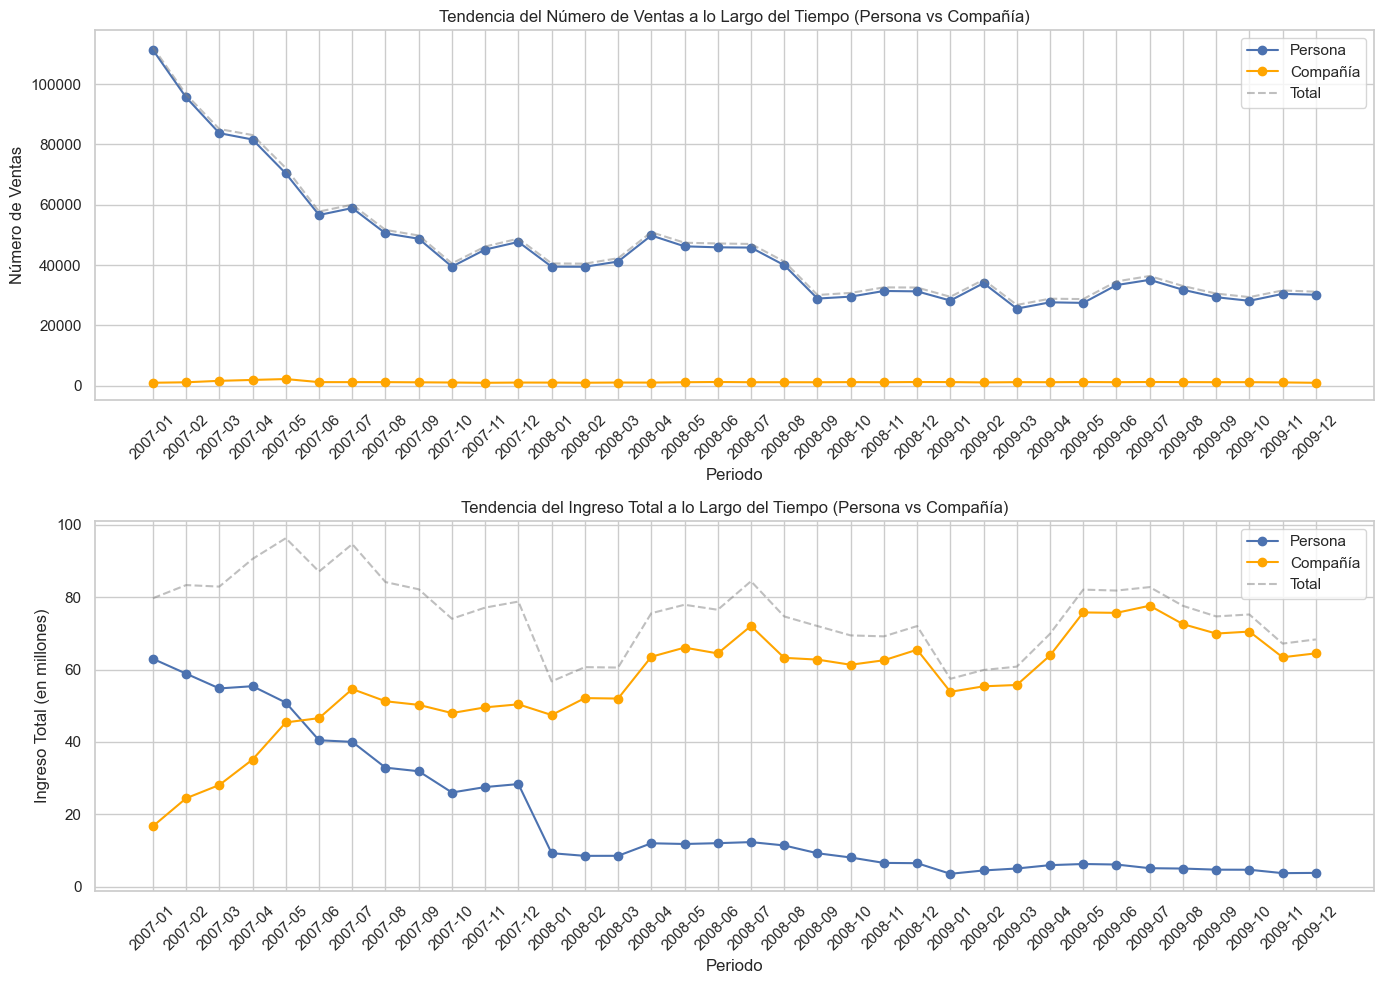

In [186]:
# Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total para cada tipo de cliente
ventas_persona = df_persona.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

ventas_compania = df_compania.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Calcular los totales (sumando Persona y Compañía)
ventas_totales = df_.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_persona.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_compania.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_totales.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 5: Visualizar la tendencia de ventas y de ingresos comparando Persona vs Compañía, con la línea de totales
plt.figure(figsize=(14, 10))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Numero de Ventas'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Numero de Ventas'], marker='o', label='Compañía', color='orange')
plt.plot(ventas_totales['Periodo'].astype(str), ventas_totales['Numero de Ventas'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Ingreso Total'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Ingreso Total'], marker='o', label='Compañía', color='orange')
plt.plot(ventas_totales['Periodo'].astype(str), ventas_totales['Ingreso Total'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


↑ ▲ Se observa una caida estrepitosa en las ventas(S/) de las personas.

 Lo que esta salvando a la empresa son las ventas(S/) a de las compañias a pesar de que se tienen pocas OrdenesCompra en las compañias estas representan alto monto de Venta(S/) ya que el ARPU de las compañias es mas alto

### Utilidades (S/) / Comparativo: Compañia vs Personas

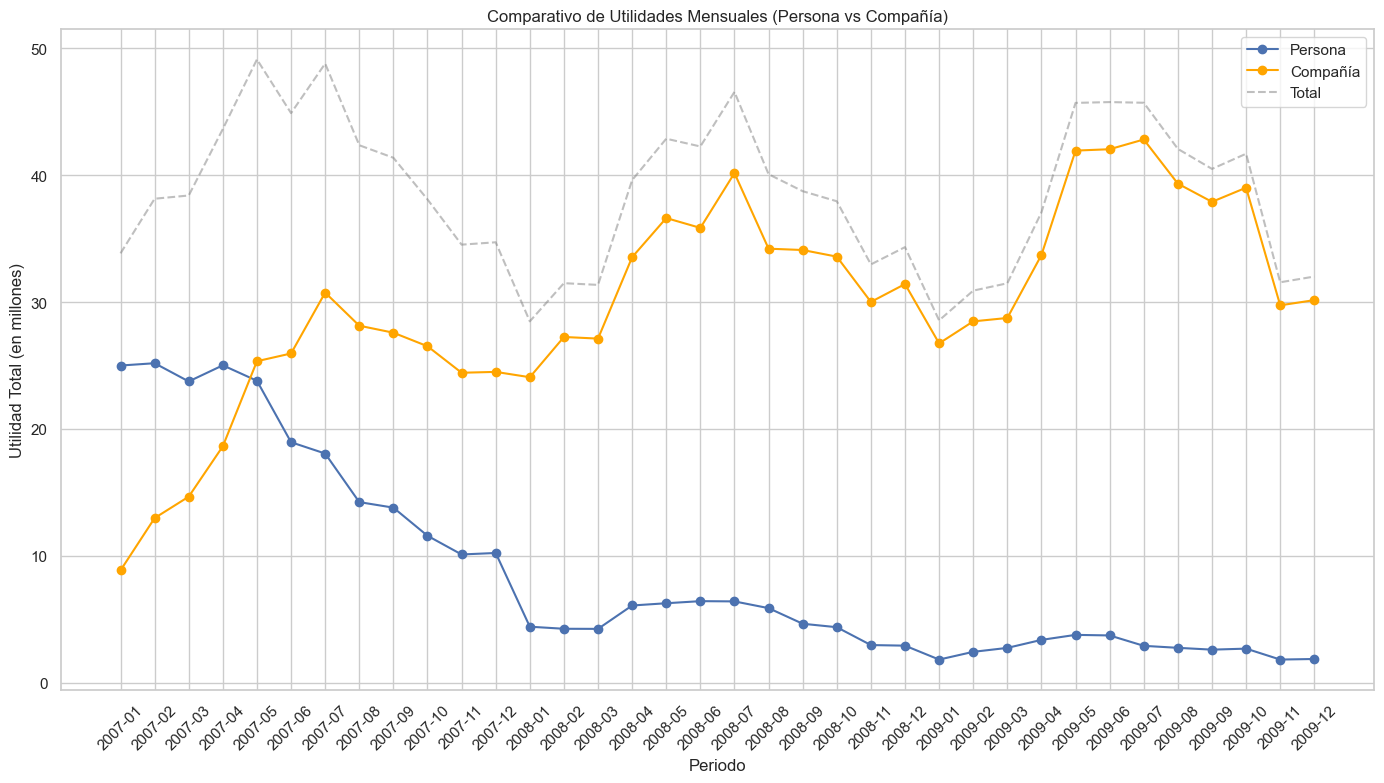

In [187]:
# Paso 1: Calcular la utilidad por transacción
# df_['Utilidad'] = df_['fos_SalesAmount'] - df_['fos_TotalCost']

# Paso 2: Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
#df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date

# Paso 3: Extraer año y mes para agrupar las utilidades
#df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

# Paso 4: Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Paso 5: Agrupar por 'YearMonth' y calcular la utilidad total para cada tipo de cliente
utilidad_persona = df_persona.groupby('YearMonth')['Utilidad'].sum().reset_index()
utilidad_compania = df_compania.groupby('YearMonth')['Utilidad'].sum().reset_index()

# Calcular la utilidad total (sumando Persona y Compañía)
utilidad_total = df_.groupby('YearMonth')['Utilidad'].sum().reset_index()

# Renombrar las columnas para mayor claridad
utilidad_persona.columns = ['Periodo', 'Utilidad Total']
utilidad_compania.columns = ['Periodo', 'Utilidad Total']
utilidad_total.columns = ['Periodo', 'Utilidad Total']

# Paso 6: Visualizar la utilidad mensual comparando Persona vs Compañía, con la línea de totales
plt.figure(figsize=(14, 8))

# Gráfico de línea para la utilidad
plt.plot(utilidad_persona['Periodo'].astype(str), utilidad_persona['Utilidad Total'], marker='o', label='Persona')
plt.plot(utilidad_compania['Periodo'].astype(str), utilidad_compania['Utilidad Total'], marker='o', label='Compañía', color='orange')
plt.plot(utilidad_total['Periodo'].astype(str), utilidad_total['Utilidad Total'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Comparativo de Utilidades Mensuales (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Utilidad Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


## Correlacion

In [58]:
# Lista de las columnas que quieres filtrar
columnas_ = [
                       'fos_SalesQuantity',
                      'fos_SalesAmount','fos_ReturnQuantity','fos_ReturnAmount','fos_DiscountQuantity','fos_DiscountAmount',
                      'fos_TotalCost',
                      'fos_UnitPrice', #'dcu_BirthDate',
                      'dcu_Edad',
                      #'dcu_MaritalStatus','dcu_Gender',
                      #'dcu_YearlyIncome','dcu_TotalChildren','dcu_NumberChildrenAtHome',
                      #'dcu_Education','dcu_Occupation','dcu_HouseOwnerFlag',
                      'dcu_NumberCarsOwned'
                      #,'dcu_CustomerType',
                      #'dcu_CompanyName','dp_ProductName','dp_Manufacturer','dp_BrandName',
                      #'dp_ClassName','dp_ColorID','dp_ColorName','ds_StoreName'
                      ]

df_encod = df_[columnas_].copy()

In [59]:
# Paso 2: Aplicar Label Encoding a las columnas especificadas
label_enc_cols = ['dcu_HouseOwnerFlag', 'dcu_CustomerType', 'dcu_Education']
for col in label_enc_cols:
    le = LabelEncoder()
    df_encod[col] = le.fit_transform(df_[col])

In [61]:
# Paso 3: Aplicar One-Hot Encoding a las columnas especificadas
one_hot_enc_cols = [
    'dcu_MaritalStatus', 'dcu_Gender', 'dcu_Occupation',
     #'dp_Manufacturer',
    'dp_BrandName', 
    'dp_ClassName',# 'dp_ColorName',
    'ds_StoreName'
]

df_encod = pd.concat([df_encod, pd.get_dummies(df_[one_hot_enc_cols], drop_first=True)], axis=1)

In [63]:
# Mostrar el DataFrame resultante
df_encod.head()

,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_NumberCarsOwned,dcu_HouseOwnerFlag,dcu_CustomerType,dcu_Education,dcu_MaritalStatus_S,dcu_Gender_M,dcu_Occupation_Management,dcu_Occupation_Manual,dcu_Occupation_Professional,dcu_Occupation_Skilled Manual,dp_BrandName_Adventure Works,dp_BrandName_Adventure Works,dp_BrandName_Contoso,dp_BrandName_Contoso,dp_BrandName_Fabrikam,dp_BrandName_Fabrikam,dp_BrandName_Litware,dp_BrandName_Litware,dp_BrandName_Northwind Traders,dp_BrandName_Proseware,dp_BrandName_Southridge Video,dp_BrandName_Tailspin Toys,dp_BrandName_The Phone Company,dp_BrandName_Wide World Importers,dp_ClassName_Economy,dp_ClassName_Regular,ds_StoreName_Contoso Europe Online Store,ds_StoreName_Contoso North America Online Store
0,1,10.36,0,0.00,1,2.59,6.60,12.95,61,0.00,1,1,1,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,1,10.36,0,0.00,1,2.59,6.60,12.95,62,0.00,1,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,1,10.36,0,0.00,1,2.59,6.60,12.95,63,0.00,1,1,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,1,10.36,0,0.00,1,2.59,6.60,12.95,63,0.00,1,1,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,1,10.36,0,0.00,1,2.59,6.60,12.95,62,0.00,1,1,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [64]:
df_encod.shape

(12527442, 37)

In [65]:
#correlation matrix
corrmat = df_encod.corr()

<Axes: >

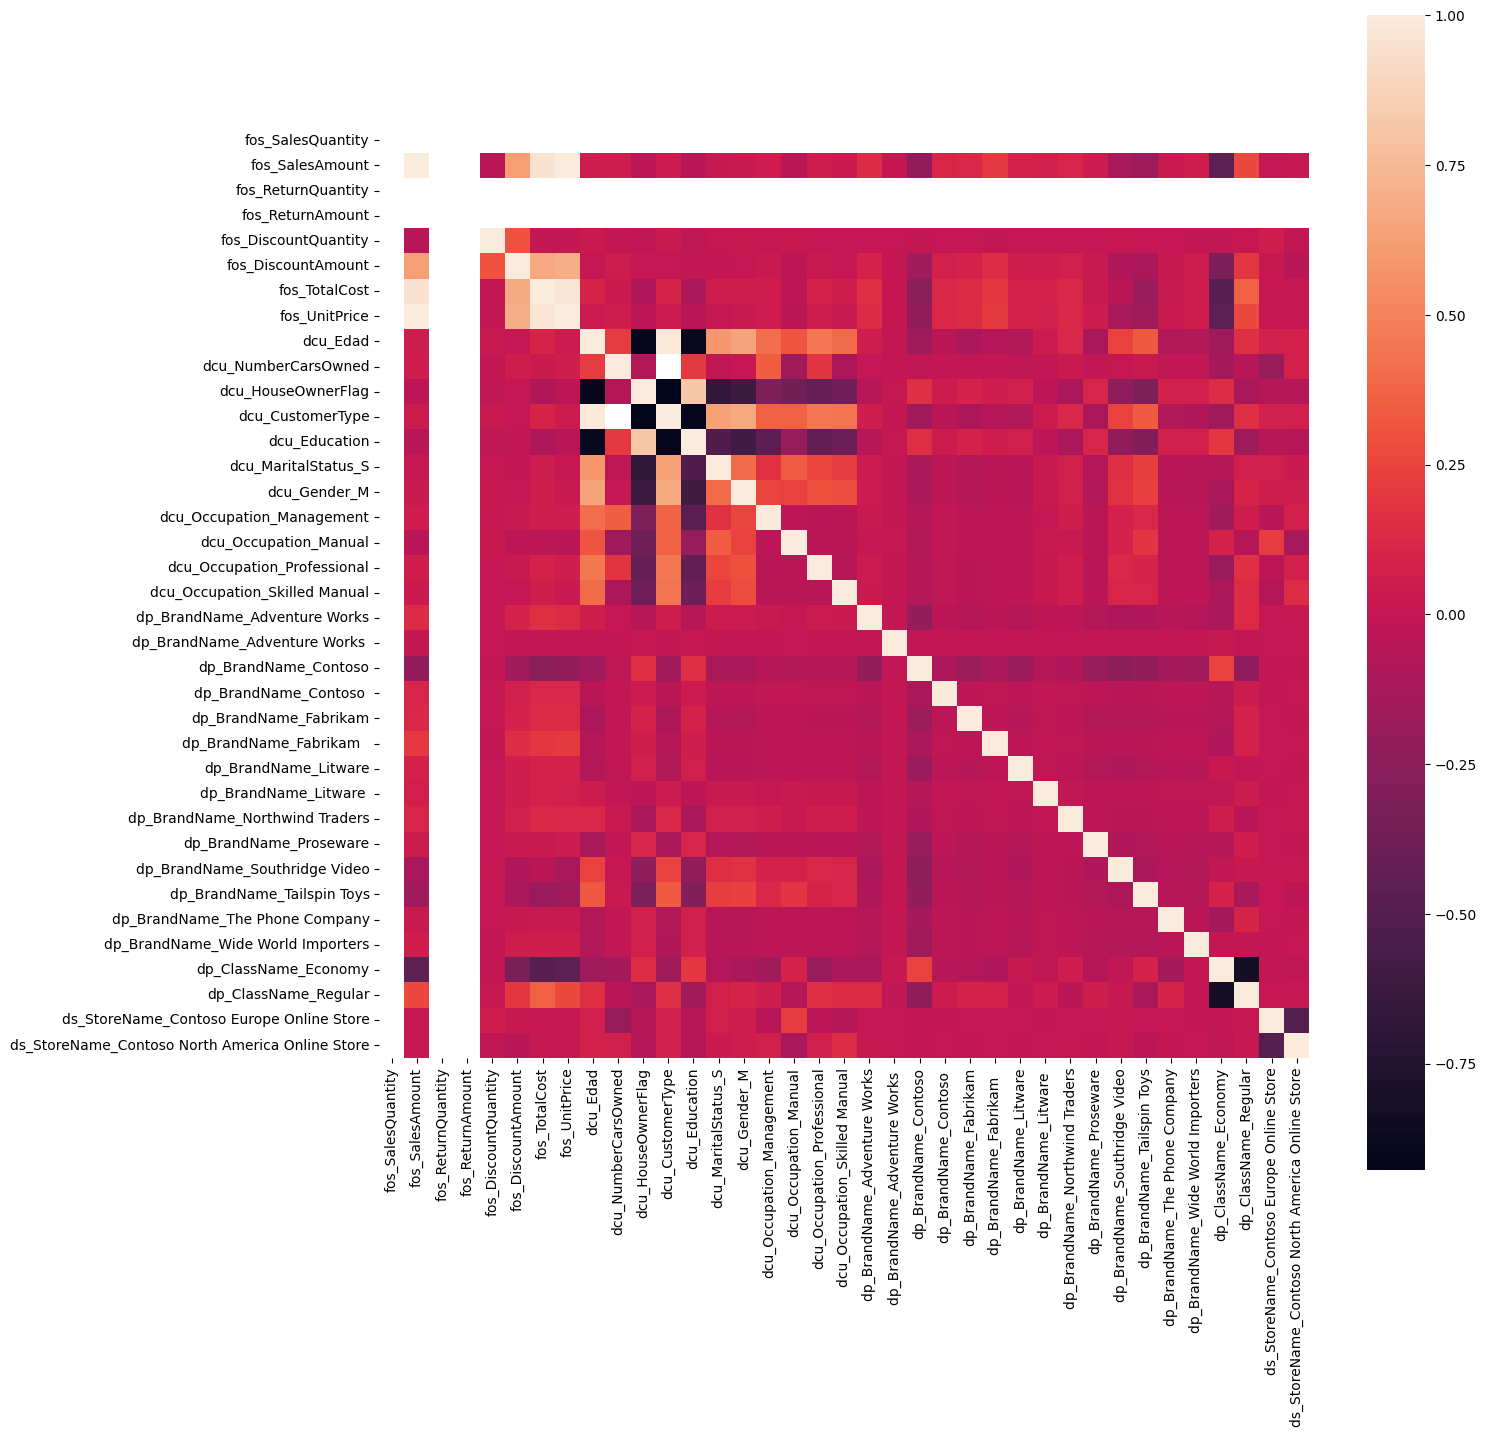

In [66]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax= 1, square=True)

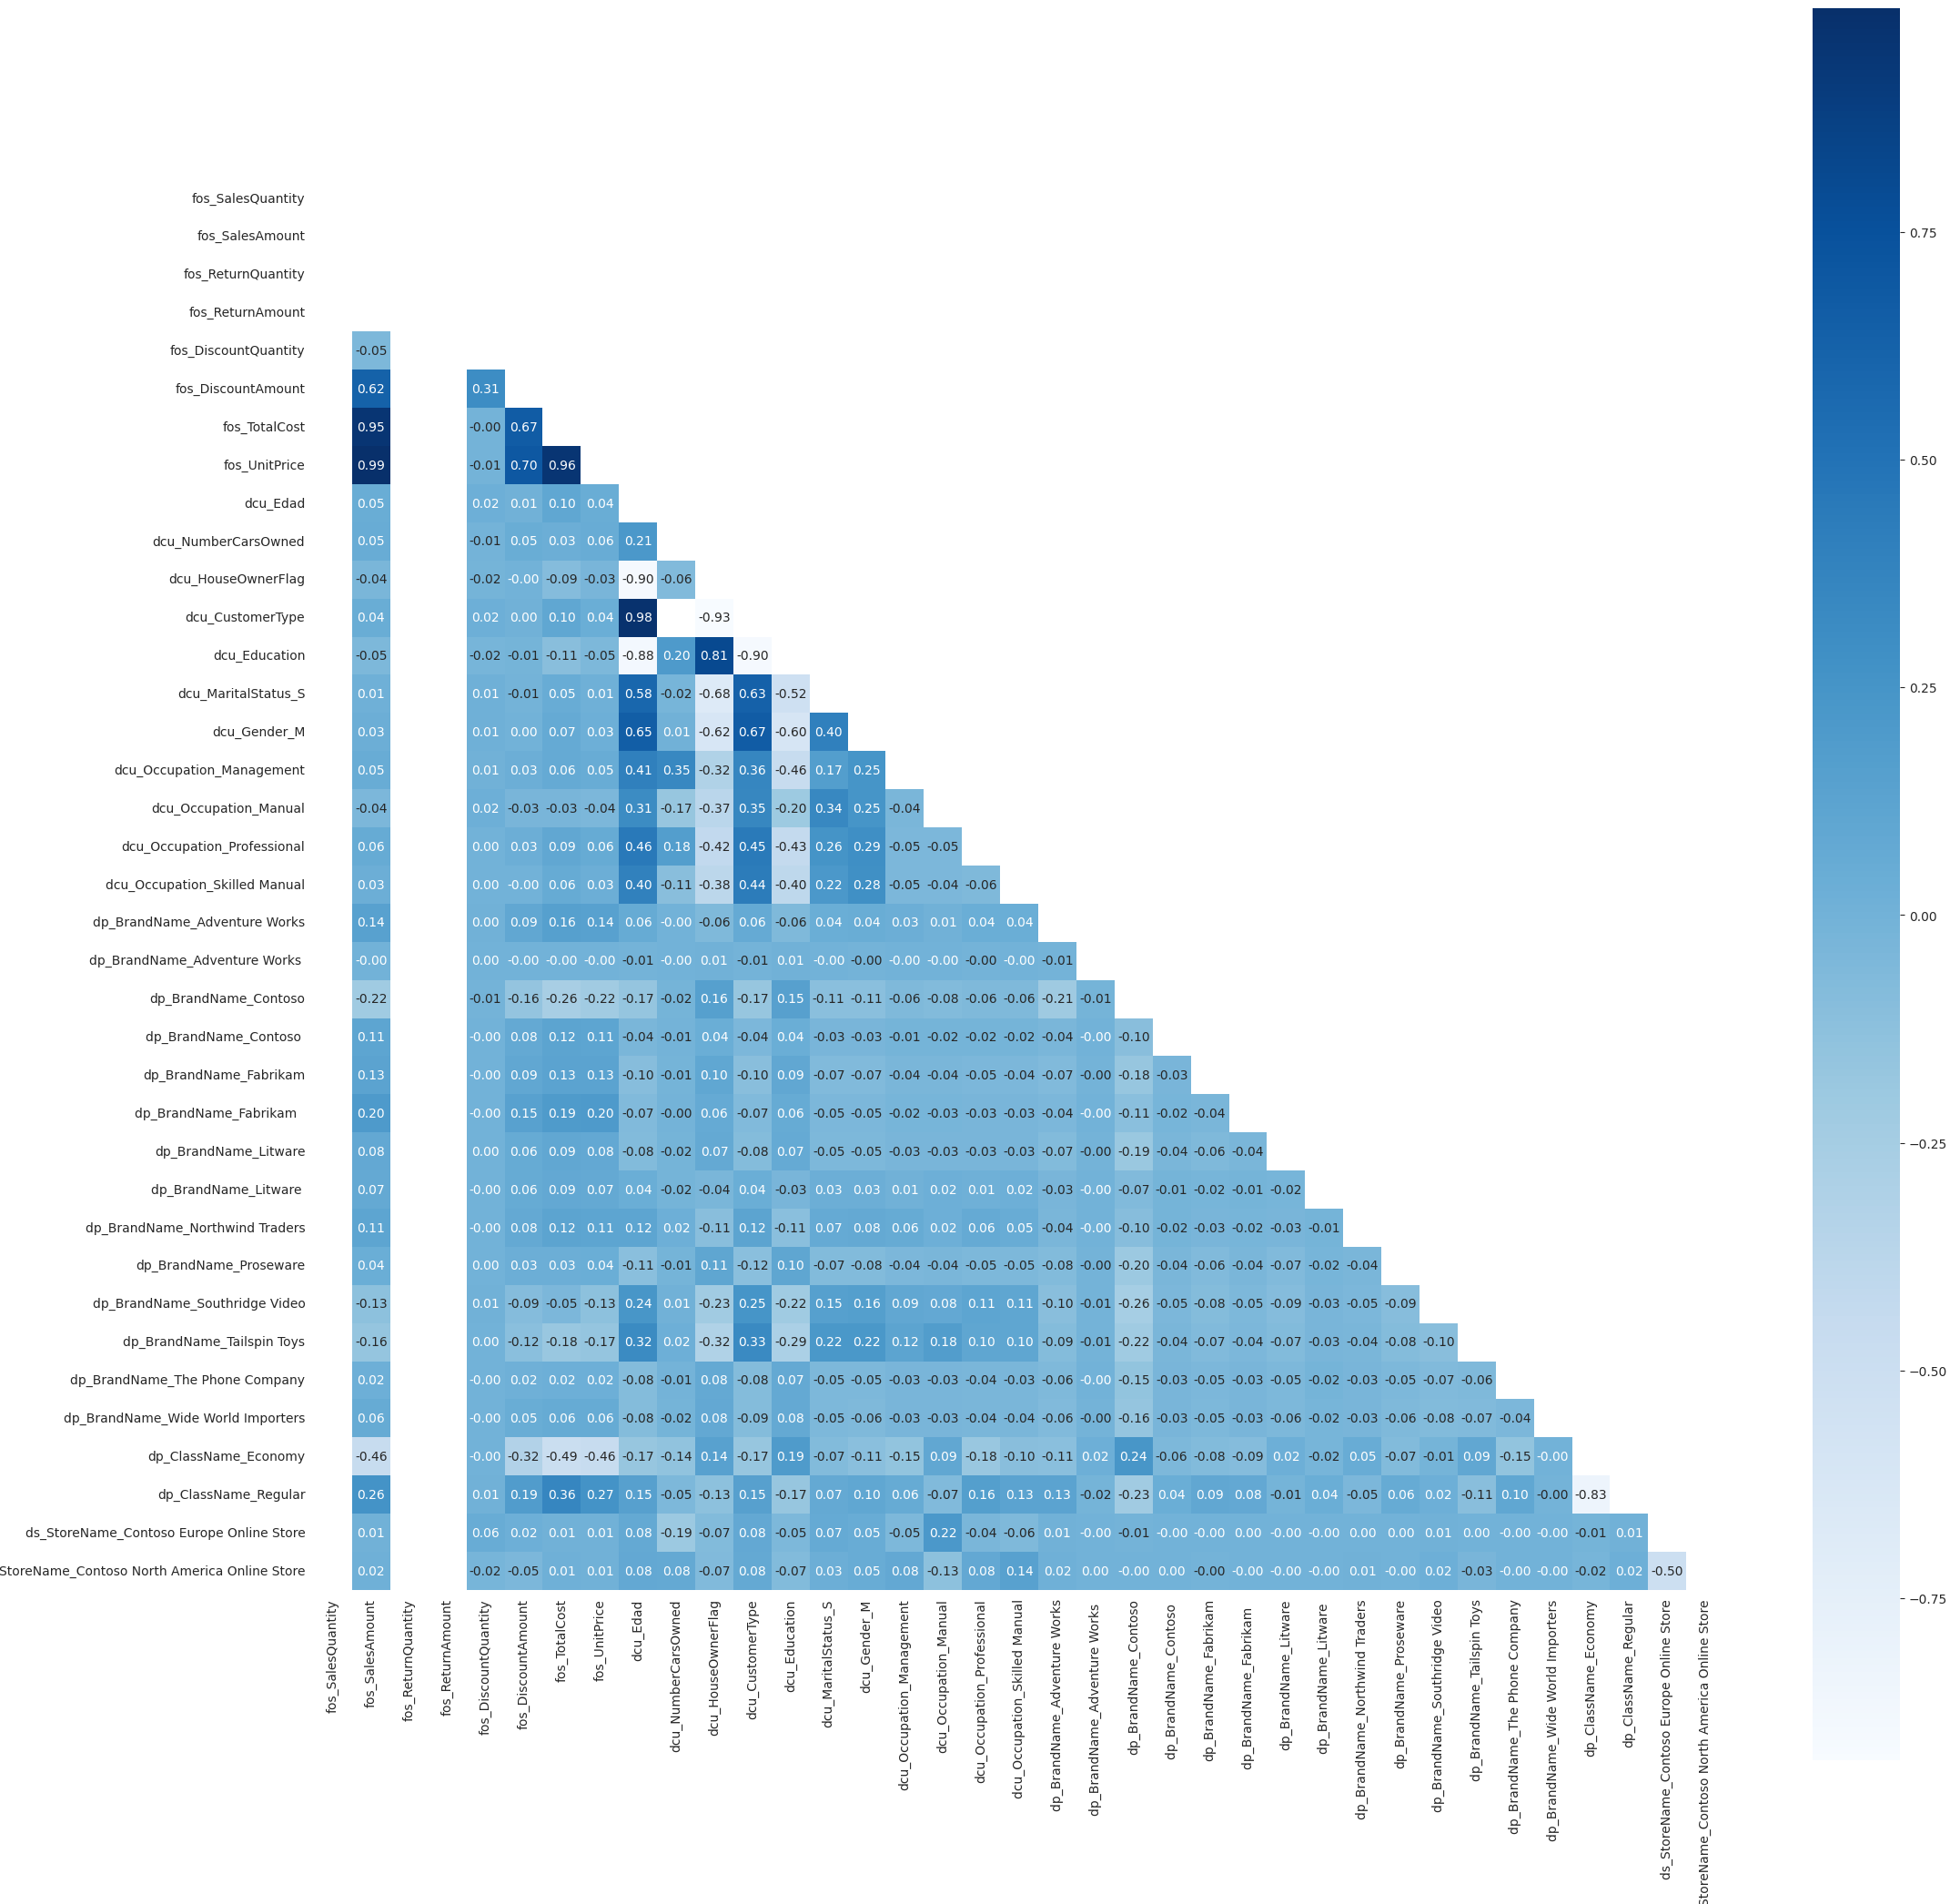

In [69]:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 25))
    ax = sns.heatmap(corrmat, cmap="Blues", mask=mask, square=True, fmt='.2f', annot=True)

In [70]:
# Calcular la correlación entre 'fos_SalesAmount' y todas las demás variables
corr_with_sales = corrmat['fos_SalesAmount'].sort_values(ascending=False)

# Filtrar para mostrar solo las correlaciones fuertes (por ejemplo, por encima de 0.5 o por debajo de -0.5)
strong_corr = corr_with_sales[(corr_with_sales > 0.5) | (corr_with_sales < -0.5)]

# Mostrar el resultado en formato tabla
strong_corr_df = pd.DataFrame(strong_corr).reset_index()
strong_corr_df.columns = ['Variable', 'Correlación con fos_SalesAmount']

# Mostrar el DataFrame resultante
strong_corr_df


,Variable,Correlación con fos_SalesAmount
0,fos_SalesAmount,1.00
1,fos_UnitPrice,0.99
2,fos_TotalCost,0.95
3,fos_DiscountAmount,0.62


## CATEGORICO

In [73]:
df_.describe(include='category')

,dcu_MaritalStatus,dcu_Gender,dcu_Education,dcu_Occupation,dcu_CustomerType,dcu_CompanyName
count,224,224,224,224,997,773
unique,2,2,5,5,2,279
top,M,M,Partial College,Skilled Manual,Company,MoscowCompany
freq,122,120,60,59,773,12


In [75]:
df_person.describe(include=np.number)

,fos_OnlineSalesKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dp_ColorID
count,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00
mean,27426203.55,252.68,996.06,6.49,8888.71,1.00,230.67,0.00,0.00,0.70,20.12,134.44,250.79,61.58,57991.07,1.99,1.16,0.66,1.47,6.20
std,4775113.18,53.80,748.62,7.06,5512.64,0.00,414.45,0.00,0.00,0.46,51.24,187.57,448.68,10.16,34132.16,1.55,1.55,0.47,1.17,3.43
min,19566448.00,199.00,8.00,1.00,75.00,1.00,3.79,0.00,0.00,0.00,0.00,2.42,4.74,43.00,10000.00,0.00,0.00,0.00,0.00,1.00
25%,22227648.25,199.00,176.00,1.00,3772.75,1.00,23.22,0.00,0.00,0.00,0.00,13.10,25.69,53.00,30000.00,1.00,0.00,0.00,0.75,2.00
50%,30718308.00,252.50,1014.50,3.00,9245.50,1.00,75.99,0.00,0.00,1.00,3.44,38.74,75.99,61.00,60000.00,2.00,0.00,1.00,1.00,7.00
75%,31501719.75,306.00,1694.00,9.00,13918.75,1.00,327.69,0.00,0.00,1.00,17.53,216.12,353.25,69.00,80000.00,3.00,2.00,1.00,2.00,8.00
max,32153189.00,307.00,2507.00,28.00,18261.00,1.00,2652.90,0.00,0.00,1.00,397.80,960.82,2899.99,91.00,170000.00,5.00,5.00,1.00,4.00,15.00


In [76]:
df_person.describe(exclude=np.number)

,fos_DateKey,fos_SalesOrderNumber,dcu_MaritalStatus,dcu_Gender,dcu_Education,dcu_Occupation,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorName,ds_StoreName
count,224,224,224,224,224,224,224,0,224,224,224,224,224,224
unique,190,224,2,2,5,5,1,0,105,10,12,3,13,3
top,2007-05-14 00:00:00,20070306428343,M,M,Partial College,Skilled Manual,Person,NaN,SV 16xDVD M360 Black,Southridge Video,Southridge Video,Regular,Silver,Contoso North America Online Store
freq,3,1,122,120,60,59,224,NaN,29,62,62,135,60,112


In [84]:
df_person['dcu_Education'].value_counts()

dcu_Education
Partial College        60
Bachelors              59
High School            44
Graduate Degree        35
Partial High School    26
Name: count, dtype: int64

In [85]:
df_person['dcu_MaritalStatus'].value_counts()

dcu_MaritalStatus
M    122
S    102
Name: count, dtype: int64

asociacion entre educacion y estado civil

In [101]:
tabla_edu_status = pd.crosstab(df_person['dcu_Education'],df_person['dcu_MaritalStatus'],normalize=True)*100
tabla_edu_status

dcu_MaritalStatus,M,S
dcu_Education,,
Bachelors,16.07,10.27
Graduate Degree,10.71,4.91
High School,8.48,11.16
Partial College,13.39,13.39
Partial High School,5.80,5.80


In [100]:
from scipy.stats import chi2_contingency
import numpy as np

# Crea la tabla de contingencia sin normalizar
tabla_contingencia = pd.crosstab(df_person['dcu_Education'], df_person['dcu_MaritalStatus'])

# Aplica la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Muestra los resultados de la prueba
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"P-valor: {p}")
#print(f"Frecuencias esperadas: \n{expected}")

# Definimos el nivel de significancia
alpha = 0.05

# Interpretación de los resultados
if p < alpha:
    print("Rechazamos la hipótesis nula (H₀): Existe una asociación significativa entre el nivel educativo y el estado civil.")
else:
    print("No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el nivel educativo y el estado civil.")

# Cálculo del Coeficiente de Cramér
n = np.sum(tabla_contingencia.values)  # Total de observaciones
min_dim = min(tabla_contingencia.shape) - 1  # Menor dimensión de la tabla de contingencia menos 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

# Interpretación del Coeficiente de Cramér
print(f"Coeficiente de Cramér V: {cramer_v}")

# Interpretación automática del valor de Cramér V
if cramer_v < 0.1:
    print("Asociación muy débil.")
elif 0.1 <= cramer_v < 0.3:
    print("Asociación débil.")
elif 0.3 <= cramer_v < 0.5:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")


Chi-cuadrado: 6.7794914313195545
Grados de libertad: 4
P-valor: 0.14801015187947308
No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el nivel educativo y el estado civil.
Coeficiente de Cramér V: 0.17397007428567218
Asociación débil.


asociacion entre educacion y genero

In [109]:
tabla_edu_gender = pd.crosstab(df_person['dcu_Education'],df_person['dcu_Gender'])
tabla_edu_gender

dcu_Gender,F,M
dcu_Education,,
Bachelors,24,35
Graduate Degree,15,20
High School,19,25
Partial College,32,28
Partial High School,14,12


In [105]:
from scipy.stats import chi2_contingency
import numpy as np

# Crear la tabla de contingencia sin normalizar
tabla_edu_gender = pd.crosstab(df_person['dcu_Education'], df_person['dcu_Gender'])

# Aplica la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_edu_gender)

# Muestra los resultados de la prueba
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"P-valor: {p}")
print(f"Frecuencias esperadas: \n{expected}")

# Definimos el nivel de significancia
alpha = 0.05

# Interpretación de los resultados
if p < alpha:
    print("Rechazamos la hipótesis nula (H₀): Existe una asociación significativa entre el nivel educativo y el género.")
else:
    print("No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el nivel educativo y el género.")

# Cálculo del Coeficiente de Cramér
n = np.sum(tabla_edu_gender.values)  # Total de observaciones
min_dim = min(tabla_edu_gender.shape) - 1  # Menor dimensión de la tabla de contingencia menos 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

# Interpretación del Coeficiente de Cramér
print(f"Coeficiente de Cramér V: {cramer_v}")

# Interpretación automática del valor de Cramér V
if cramer_v < 0.1:
    print("Asociación muy débil.")
elif 0.1 <= cramer_v < 0.3:
    print("Asociación débil.")
elif 0.3 <= cramer_v < 0.5:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")


Chi-cuadrado: 2.8756423122003305
Grados de libertad: 4
P-valor: 0.5788473475936912
Frecuencias esperadas: 
[[27.39285714 31.60714286]
 [16.25       18.75      ]
 [20.42857143 23.57142857]
 [27.85714286 32.14285714]
 [12.07142857 13.92857143]]
No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el nivel educativo y el género.
Coeficiente de Cramér V: 0.11330352551333729
Asociación débil.


estado civil y genero

In [108]:
tabla_marital_gender = pd.crosstab(df_person['dcu_MaritalStatus'],df_person['dcu_Gender'])
tabla_marital_gender

dcu_Gender,F,M
dcu_MaritalStatus,,
M,57,65
S,47,55


In [107]:
from scipy.stats import chi2_contingency
import numpy as np

# Crear la tabla de contingencia sin normalizar
tabla_marital_gender = pd.crosstab(df_person['dcu_MaritalStatus'], df_person['dcu_Gender'])

# Aplica la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_marital_gender)

# Muestra los resultados de la prueba
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"P-valor: {p}")
print(f"Frecuencias esperadas: \n{expected}")

# Definimos el nivel de significancia
alpha = 0.05

# Interpretación de los resultados
if p < alpha:
    print("Rechazamos la hipótesis nula (H₀): Existe una asociación significativa entre el estado civil y el género.")
else:
    print("No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el estado civil y el género.")

# Cálculo del Coeficiente de Cramér
n = np.sum(tabla_marital_gender.values)  # Total de observaciones
min_dim = min(tabla_marital_gender.shape) - 1  # Menor dimensión de la tabla de contingencia menos 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

# Interpretación del Coeficiente de Cramér
print(f"Coeficiente de Cramér V: {cramer_v}")

# Interpretación automática del valor de Cramér V
if cramer_v < 0.1:
    print("Asociación muy débil.")
elif 0.1 <= cramer_v < 0.3:
    print("Asociación débil.")
elif 0.3 <= cramer_v < 0.5:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")


Chi-cuadrado: 0.0
Grados de libertad: 1
P-valor: 1.0
Frecuencias esperadas: 
[[56.64285714 65.35714286]
 [47.35714286 54.64285714]]
No podemos rechazar la hipótesis nula (H₀): No existe una asociación significativa entre el estado civil y el género.
Coeficiente de Cramér V: 0.0
Asociación muy débil.


### ANOVA de estado civil y costo

In [125]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Agrupar las ganancias ('fos_TotalCost') por estado civil ('dcu_MaritalStatus')
grouped_data = [df_person['fos_TotalCost'][df_person['dcu_MaritalStatus'] == group] for group in df_person['dcu_MaritalStatus'].unique()]

# Realizar el ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Preparar los datos para la tabla ANOVA
anova_table = [["Source", "SS", "df", "MS", "F", "P-value"],
               ["Between Groups", round(anova_result.statistic * (len(df_person['dcu_MaritalStatus'].unique()) - 1), 2), 
                len(df_person['dcu_MaritalStatus'].unique()) - 1, round(anova_result.statistic, 2), round(anova_result.statistic, 2), round(anova_result.pvalue, 4)],
               ["Within Groups", "N/A", len(df_person) - len(df_person['dcu_MaritalStatus'].unique()), "N/A", "N/A", "N/A"],
               ["Total", "N/A", len(df_person) - 1, "N/A", "N/A", "N/A"]]

# Mostrar la tabla ANOVA usando tabulate
print(tabulate(anova_table, headers="firstrow", tablefmt="grid"))

# Interpretación de los resultados
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nRechazamos la hipótesis nula (H₀): Existen diferencias significativas en el costo total (fos_TotalCost) entre al menos uno de los grupos de estado civil.")
else:
    print("\nNo rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre los grupos de estado civil.")


+----------------+------+------+------+------+-----------+
| Source         | SS   |   df | MS   | F    | P-value   |
+================+======+======+======+======+===========+
| Between Groups | 0.75 |    1 | 0.75 | 0.75 | 0.3873    |
+----------------+------+------+------+------+-----------+
| Within Groups  | N/A  |  222 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+
| Total          | N/A  |  223 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+

No rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre los grupos de estado civil.


### asoaicion costo y genero

In [126]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Supongamos que df_person es tu DataFrame que contiene 'dcu_Gender' y 'fos_TotalCost'

# Agrupar las ganancias ('fos_TotalCost') por género ('dcu_Gender')
grouped_data = [df_person['fos_TotalCost'][df_person['dcu_Gender'] == group] for group in df_person['dcu_Gender'].unique()]

# Realizar el ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Preparar los datos para la tabla ANOVA
anova_table = [["Source", "SS", "df", "MS", "F", "P-value"],
               ["Between Groups", round(anova_result.statistic * (len(df_person['dcu_Gender'].unique()) - 1), 2), 
                len(df_person['dcu_Gender'].unique()) - 1, round(anova_result.statistic, 2), round(anova_result.statistic, 2), round(anova_result.pvalue, 4)],
               ["Within Groups", "N/A", len(df_person) - len(df_person['dcu_Gender'].unique()), "N/A", "N/A", "N/A"],
               ["Total", "N/A", len(df_person) - 1, "N/A", "N/A", "N/A"]]

# Mostrar la tabla ANOVA usando tabulate
print(tabulate(anova_table, headers="firstrow", tablefmt="grid"))

# Interpretación de los resultados
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nRechazamos la hipótesis nula (H₀): Existen diferencias significativas en el costo total (fos_TotalCost) entre los géneros.")
else:
    print("\nNo rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre los géneros.")


+----------------+------+------+------+------+-----------+
| Source         | SS   |   df | MS   | F    | P-value   |
+================+======+======+======+======+===========+
| Between Groups | 0.25 |    1 | 0.25 | 0.25 | 0.6147    |
+----------------+------+------+------+------+-----------+
| Within Groups  | N/A  |  222 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+
| Total          | N/A  |  223 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+

No rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre los géneros.


asociacion costo y ocupacion

In [127]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Supongamos que df_person es tu DataFrame que contiene 'dcu_Occupation' y 'fos_TotalCost'

# Agrupar los costos totales ('fos_TotalCost') por ocupación ('dcu_Occupation')
grouped_data = [df_person['fos_TotalCost'][df_person['dcu_Occupation'] == group] for group in df_person['dcu_Occupation'].unique()]

# Realizar el ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Preparar los datos para la tabla ANOVA
anova_table = [["Source", "SS", "df", "MS", "F", "P-value"],
               ["Between Groups", round(anova_result.statistic * (len(df_person['dcu_Occupation'].unique()) - 1), 2), 
                len(df_person['dcu_Occupation'].unique()) - 1, round(anova_result.statistic, 2), round(anova_result.statistic, 2), round(anova_result.pvalue, 4)],
               ["Within Groups", "N/A", len(df_person) - len(df_person['dcu_Occupation'].unique()), "N/A", "N/A", "N/A"],
               ["Total", "N/A", len(df_person) - 1, "N/A", "N/A", "N/A"]]

# Mostrar la tabla ANOVA usando tabulate
print(tabulate(anova_table, headers="firstrow", tablefmt="grid"))

# Interpretación de los resultados
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nRechazamos la hipótesis nula (H₀): Existen diferencias significativas en el costo total (fos_TotalCost) entre al menos una de las ocupaciones.")
else:
    print("\nNo rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre las ocupaciones.")


+----------------+-------+------+------+------+-----------+
| Source         | SS    |   df | MS   | F    | P-value   |
+================+=======+======+======+======+===========+
| Between Groups | 10.68 |    4 | 2.67 | 2.67 | 0.0332    |
+----------------+-------+------+------+------+-----------+
| Within Groups  | N/A   |  219 | N/A  | N/A  | N/A       |
+----------------+-------+------+------+------+-----------+
| Total          | N/A   |  223 | N/A  | N/A  | N/A       |
+----------------+-------+------+------+------+-----------+

Rechazamos la hipótesis nula (H₀): Existen diferencias significativas en el costo total (fos_TotalCost) entre al menos una de las ocupaciones.


In [130]:
descriptive_stats = df_person.groupby('dcu_Occupation')['fos_TotalCost'].describe()
print(descriptive_stats)


                count   mean    std  min   25%    50%    75%    max
dcu_Occupation                                                     
Clerical        43.00 139.18 173.48 2.80 13.10  68.06 258.36 914.67
Management      36.00 177.53 270.69 4.08  5.63  27.02 226.68 914.67
Manual          28.00  91.37 127.43 2.42  3.36  24.61 209.84 509.32
Professional    58.00 175.66 218.52 4.08 30.58 135.10 226.48 960.82
Skilled Manual  59.00  84.62  92.12 2.54 13.10  32.25 200.89 258.36


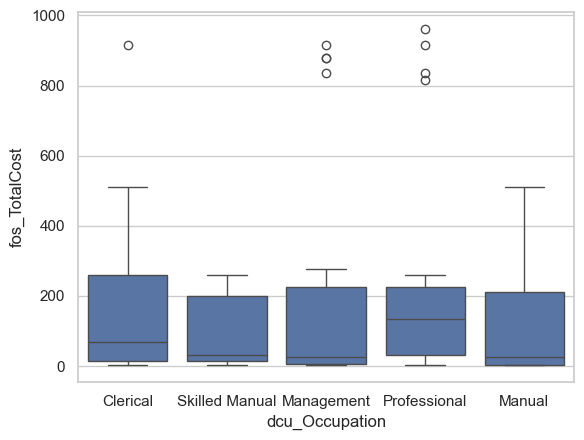

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='dcu_Occupation', y='fos_TotalCost', data=df_person)
plt.show()


In [133]:
#tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar la prueba de Tukey's HSD
tukey_result = pairwise_tukeyhsd(endog=df_person['fos_TotalCost'], 
                                 groups=df_person['dcu_Occupation'], 
                                 alpha=0.05)

# Mostrar los resultados
print(tukey_result)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1        group2     meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
    Clerical     Management  38.3482 0.8896  -76.4993 153.1958  False
    Clerical         Manual -47.8056 0.8242 -171.2609  75.6497  False
    Clerical   Professional  36.4781 0.8637  -65.8292 138.7853  False
    Clerical Skilled Manual -54.5612 0.5816 -156.4986  47.3762  False
  Management         Manual -86.1539 0.3478 -214.2552  41.9474  False
  Management   Professional  -1.8702    1.0 -109.7382 105.9978  False
  Management Skilled Manual -92.9094 0.1256 -200.4267  14.6079  False
      Manual   Professional  84.2837 0.2784  -32.7066 201.2741  False
      Manual Skilled Manual  -6.7556 0.9999 -123.4227 109.9116  False
Professional Skilled Manual -91.0393 0.0628 -185.0434   2.9648  False
---------------------------------------------------------------------


en tukey se contradice, el p-adj es mayor q 0.05, por tanto no encontró diferencias significativas de las medias de los costos

In [134]:
import pandas as pd

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_person['fos_TotalCost'].quantile(0.25)
Q3 = df_person['fos_TotalCost'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df_person_no_outliers = df_person[(df_person['fos_TotalCost'] >= lower_bound) & (df_person['fos_TotalCost'] <= upper_bound)]

# Mostrar el número de registros después de eliminar los outliers
print(f"Datos restantes después de eliminar outliers: {df_person_no_outliers.shape[0]}")


Datos restantes después de eliminar outliers: 215


In [135]:
from scipy import stats
from tabulate import tabulate

# Agrupar los costos totales ('fos_TotalCost') por ocupación ('dcu_Occupation') sin outliers
grouped_data_no_outliers = [df_person_no_outliers['fos_TotalCost'][df_person_no_outliers['dcu_Occupation'] == group] for group in df_person_no_outliers['dcu_Occupation'].unique()]

# Realizar el ANOVA
anova_result_no_outliers = stats.f_oneway(*grouped_data_no_outliers)

# Preparar los datos para la tabla ANOVA
anova_table_no_outliers = [["Source", "SS", "df", "MS", "F", "P-value"],
                           ["Between Groups", round(anova_result_no_outliers.statistic * (len(df_person_no_outliers['dcu_Occupation'].unique()) - 1), 2), 
                            len(df_person_no_outliers['dcu_Occupation'].unique()) - 1, round(anova_result_no_outliers.statistic, 2), round(anova_result_no_outliers.statistic, 2), round(anova_result_no_outliers.pvalue, 4)],
                           ["Within Groups", "N/A", len(df_person_no_outliers) - len(df_person_no_outliers['dcu_Occupation'].unique()), "N/A", "N/A", "N/A"],
                           ["Total", "N/A", len(df_person_no_outliers) - 1, "N/A", "N/A", "N/A"]]

# Mostrar la tabla ANOVA usando tabulate
print(tabulate(anova_table_no_outliers, headers="firstrow", tablefmt="grid"))

# Interpretación de los resultados
alpha = 0.05
if anova_result_no_outliers.pvalue < alpha:
    print("\nRechazamos la hipótesis nula (H₀): Existen diferencias significativas en el costo total (fos_TotalCost) entre al menos una de las ocupaciones.")
else:
    print("\nNo rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre las ocupaciones.")


+----------------+------+------+------+------+-----------+
| Source         | SS   |   df | MS   | F    | P-value   |
+================+======+======+======+======+===========+
| Between Groups | 5.42 |    4 | 1.35 | 1.35 | 0.2508    |
+----------------+------+------+------+------+-----------+
| Within Groups  | N/A  |  210 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+
| Total          | N/A  |  214 | N/A  | N/A  | N/A       |
+----------------+------+------+------+------+-----------+

No rechazamos la hipótesis nula (H₀): No existen diferencias significativas en el costo total (fos_TotalCost) entre las ocupaciones.


gracias a quitar los otuliers, ahora sale lo contrario a con outliers

In [136]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar la prueba de Tukey's HSD sin outliers
tukey_result_no_outliers = pairwise_tukeyhsd(endog=df_person_no_outliers['fos_TotalCost'], 
                                             groups=df_person_no_outliers['dcu_Occupation'], 
                                             alpha=0.05)

# Mostrar los resultados
print(tukey_result_no_outliers)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1        group2     meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
    Clerical     Management -30.6412 0.7537 -101.1383  39.8558  False
    Clerical         Manual -29.3415 0.8056 -102.6409  43.9578  False
    Clerical   Professional   2.6352    1.0  -59.1762  64.4467  False
    Clerical Skilled Manual -36.0971 0.4752  -96.7519  24.5577  False
  Management         Manual   1.2997    1.0   -76.446  79.0454  False
  Management   Professional  33.2764   0.65  -33.7478 100.3007  False
  Management Skilled Manual  -5.4559 0.9994  -71.4149  60.5032  False
      Manual   Professional  31.9768 0.7174  -37.9891 101.9426  False
      Manual Skilled Manual  -6.7556 0.9988  -75.7016  62.1905  False
Professional Skilled Manual -38.7323 0.3294  -95.3134  17.8488  False
---------------------------------------------------------------------


por tanto, al quitar los otuliers, se ve que no existen diferencia significativa en la media de los costos de diversas ocupaciones